In [49]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_villeta=pd.read_csv('D:\estadisticas\estacion villeta met.csv')
df_villeta.columns

C:\Users\lukas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['CodigoEstacion', 'NombreEstacion', 'Latitud', 'Longitud', 'Altitud',
       'Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
       'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta',
       'DescripcionSerie', 'Frecuencia', 'Fecha', 'Valor', 'Grado',
       'Calificador', 'NivelAprobacion'],
      dtype='object')

In [3]:
df_villeta.head()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 00:00,0.0,50,NaN,900
1,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 01:00,0.0,50,NaN,900
2,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 02:00,0.0,50,NaN,900
3,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 03:00,9.0,50,NaN,900
4,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 04:00,4.8,50,NaN,900


In [4]:
df_villeta.describe(include='all')

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
count,6.691100e+04,66911,66911.000000,66911.000000,66911.0,66911,66911,66911,66911,66911,...,0.0,66911,66911,66911,66911,66911,66911.000000,66911.000000,460,66911.000000
unique,NaN,2,NaN,NaN,NaN,2,1,1,1,1,...,NaN,2,6,6,3,63401,NaN,NaN,3,NaN
top,NaN,VILLETA - AUT [23065180],NaN,NaN,NaN,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2019-05-05 00:00,NaN,NaN,EST. OTROS METODOS,NaN
freq,NaN,63397,NaN,NaN,NaN,63397,66911,66911,66911,66911,...,NaN,63397,63397,63397,63397,3,NaN,NaN,404,NaN
mean,2.306528e+07,NaN,5.016426,-74.470769,878.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.645635,47.265816,NaN,903.116080
std,4.216021e+02,NaN,0.001847,0.000861,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.568755,11.426898,NaN,30.415913
min,2.306518e+07,NaN,5.008583,-74.470972,878.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1.000000,NaN,900.000000
25%,2.306518e+07,NaN,5.016861,-74.470972,878.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,50.000000,NaN,900.000000
50%,2.306518e+07,NaN,5.016861,-74.470972,878.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,50.000000,NaN,900.000000
75%,2.306518e+07,NaN,5.016861,-74.470972,878.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,50.000000,NaN,900.000000


In [5]:
df_villeta.dtypes

CodigoEstacion        int64
NombreEstacion       object
Latitud             float64
Longitud            float64
Altitud               int64
Categoria            object
Entidad              object
AreaOperativa        object
Departamento         object
Municipio            object
FechaInstalacion     object
FechaSuspension     float64
IdParametro          object
Etiqueta             object
DescripcionSerie     object
Frecuencia           object
Fecha                object
Valor               float64
Grado                 int64
Calificador          object
NivelAprobacion       int64
dtype: object

In [6]:
df_villeta.convert_dtypes().dtypes

CodigoEstacion        Int64
NombreEstacion       string
Latitud             float64
Longitud            float64
Altitud               Int64
Categoria            string
Entidad              string
AreaOperativa        string
Departamento         string
Municipio            string
FechaInstalacion     string
FechaSuspension       Int64
IdParametro          string
Etiqueta             string
DescripcionSerie     string
Frecuencia           string
Fecha                string
Valor               float64
Grado                 Int64
Calificador          string
NivelAprobacion       Int64
dtype: object

In [7]:
df_villeta.shape

(66911, 21)

In [8]:
df_villeta['Fecha']

0        2013-12-02 00:00
1        2013-12-02 01:00
2        2013-12-02 02:00
3        2013-12-02 03:00
4        2013-12-02 04:00
               ...       
66906    2021-02-24 00:00
66907    01/01/2016 00:00
66908    01/01/2018 00:00
66909    01/01/2019 00:00
66910    01/01/2020 00:00
Name: Fecha, Length: 66911, dtype: object

In [9]:
df_villeta.groupby(by=['DescripcionSerie','IdParametro',])


In [10]:
df_villeta.dtypes

CodigoEstacion        int64
NombreEstacion       object
Latitud             float64
Longitud            float64
Altitud               int64
Categoria            object
Entidad              object
AreaOperativa        object
Departamento         object
Municipio            object
FechaInstalacion     object
FechaSuspension     float64
IdParametro          object
Etiqueta             object
DescripcionSerie     object
Frecuencia           object
Fecha                object
Valor               float64
Grado                 int64
Calificador          object
NivelAprobacion       int64
dtype: object

In [11]:
df_caudal=df_villeta.set_index(['IdParametro'])
df_caudal.head(10)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
IdParametro,,,,,,,,,,,,,,,,,,,,
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 00:00,0.0,50,NaN,900
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 01:00,0.0,50,NaN,900
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 02:00,0.0,50,NaN,900
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 03:00,9.0,50,NaN,900
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 04:00,4.8,50,NaN,900
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 05:00,2.0,50,NaN,900
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 06:00,1.0,50,NaN,900
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 07:00,0.5,50,NaN,900
PRECIPITACION,23065180,VILLETA - AUT [23065180],5.016861,-74.470972,878,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,10/12/2004 00:00,NaN,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2013-12-02 08:00,0.0,50,NaN,900


In [12]:
dfcaudal=df_caudal.drop(columns=['Categoria','Entidad','AreaOperativa'],index=['PRECIPITACION'],inplace=True) 

In [13]:
idx_filtro=df_villeta['IdParametro'].isin(['CAUDAL'])
idx_filtro

0        False
1        False
2        False
3        False
4        False
         ...  
66906     True
66907     True
66908     True
66909     True
66910     True
Name: IdParametro, Length: 66911, dtype: bool

In [14]:
df_caudal=df_villeta[idx_filtro]


In [15]:
df_caudal.drop(['FechaSuspension' , 'Entidad'], axis=1, inplace=True )

C:\Users\lukas\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df_parametro=df_caudal.set_index('DescripcionSerie')
df_parametro

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,AreaOperativa,Departamento,Municipio,FechaInstalacion,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,
Caudal máximo anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MX_A,Annual,01/01/2018 00:00,237.000000,50,NaN,900
Caudal máximo anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MX_A,Annual,01/01/2019 00:00,233.397594,50,NaN,900
Caudal máximo anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MX_A,Annual,01/01/2020 00:00,231.600000,50,NaN,900
Caudal medio anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_A,Annual,01/01/2018 00:00,10.607445,4,ESTIMADO,900
Caudal medio anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_A,Annual,01/01/2019 00:00,4.568740,50,MIRA NO TIENE DATO,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Caudal medio diario,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_D,Diaria,2021-02-24 00:00,2.244167,50,NaN,900
Caudal mínimo anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MN_A,Annual,01/01/2016 00:00,0.000000,4,NaN,900
Caudal mínimo anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MN_A,Annual,01/01/2018 00:00,0.100000,50,NaN,900


In [17]:
q_max=df_parametro['Frecuencia'].isin(['Annual'])
q_max

DescripcionSerie
Caudal máximo anual     True
Caudal máximo anual     True
Caudal máximo anual     True
Caudal medio anual      True
Caudal medio anual      True
                       ...  
Caudal medio diario    False
Caudal mínimo anual     True
Caudal mínimo anual     True
Caudal mínimo anual     True
Caudal mínimo anual     True
Name: Frecuencia, Length: 3514, dtype: bool

In [18]:
q_d=df_parametro[q_max]


In [19]:
q_dm=q_d.loc[pd.IndexSlice['Caudal medio anual'],:].sort_index()
q_dm

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,AreaOperativa,Departamento,Municipio,FechaInstalacion,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,
Caudal medio anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_A,Annual,01/01/2018 00:00,10.607445,4,ESTIMADO,900
Caudal medio anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_A,Annual,01/01/2019 00:00,4.568740,50,MIRA NO TIENE DATO,900
Caudal medio anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_A,Annual,01/01/2020 00:00,4.558259,50,NaN,900


In [43]:
df_parametro['Fecha']=pd.to_datetime(df_parametro['Fecha'])

In [45]:
df_parametro.dtypes

CodigoEstacion               int64
NombreEstacion              object
Latitud                    float64
Longitud                   float64
Altitud                      int64
Categoria                   object
AreaOperativa               object
Departamento                object
Municipio                   object
FechaInstalacion            object
IdParametro                 object
Etiqueta                    object
Frecuencia                  object
Fecha               datetime64[ns]
Valor                      float64
Grado                        int64
Calificador                 object
NivelAprobacion              int64
dtype: object

In [67]:
quadal=df_parametro.set_index('Fecha','Valor')
quadal


,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,AreaOperativa,Departamento,Municipio,FechaInstalacion,IdParametro,Etiqueta,Frecuencia,Valor,Grado,Calificador,NivelAprobacion
Fecha,,,,,,,,,,,,,,,,,
2018-01-01,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MX_A,Annual,237.000000,50,NaN,900
2019-01-01,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MX_A,Annual,233.397594,50,NaN,900
2020-01-01,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MX_A,Annual,231.600000,50,NaN,900
2018-01-01,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_A,Annual,10.607445,4,ESTIMADO,900
2019-01-01,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_A,Annual,4.568740,50,MIRA NO TIENE DATO,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-24,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MEDIA_D,Diaria,2.244167,50,NaN,900
2016-01-01,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MN_A,Annual,0.000000,4,NaN,900
2018-01-01,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MN_A,Annual,0.100000,50,NaN,900


Etiqueta
Q_MEDIA_A    AxesSubplot(0.125,0.125;0.775x0.755)
Q_MEDIA_D       AxesSubplot(0.125,0.2;0.775x0.68)
Q_MN_A          AxesSubplot(0.125,0.2;0.775x0.68)
Q_MX_A       AxesSubplot(0.125,0.125;0.775x0.755)
Q_MX_D          AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

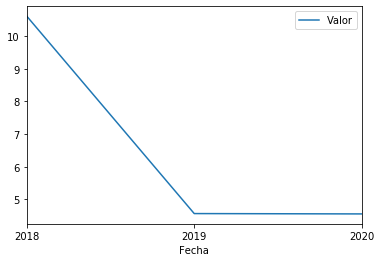

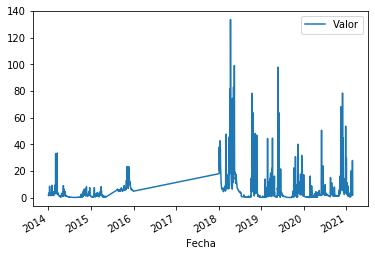

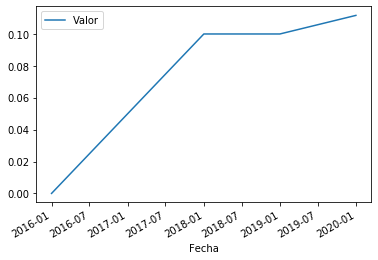

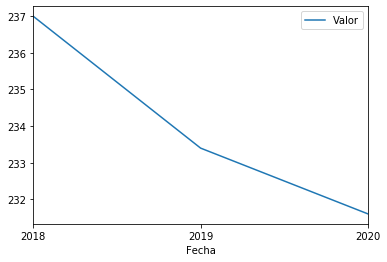

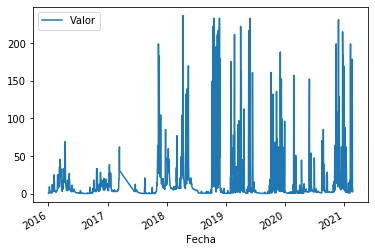

In [97]:
quadal.plot()


Fundamentos de estadistica medidad de tendencia central

In [20]:
y=q_d['Valor'].values
y

array([2.37000000e+02, 2.33397594e+02, 2.31600000e+02, 1.06074452e+01,
       4.56874027e+00, 4.55825913e+00, 0.00000000e+00, 1.00000000e-01,
       1.00000000e-01, 1.11656627e-01])

In [21]:
np.min(y)

0.0

In [22]:
np.max(y)

237.0

In [23]:
np.mean(y)

72.20436948382317

In [24]:
np.std(y)

105.97239661350575

In [25]:
# frecuencias numericas
ynum=q_d['Valor'].copy()
np.min(ynum),np.max(ynum)

(0.0, 237.0)

In [26]:
per100=np.percentile(ynum,q=100)# y maximo acumula el 100 % de los datso
per_0= np.percentile(ynum,q=0)# y minimo
per_50=np.percentile(ynum,q=50)# y mediana acumula el 50%

print("percentil 100: ", per100)
print("percentil 50: " ,per_50 )
print("percentil 0: ", per_0)

percentil 100:  237.0
percentil 50:  4.56349970218362
percentil 0:  0.0


In [27]:
valores = [0,25,50,75,100] # cuartiles
np.percentile(ynum,q=valores)

array([0.00000000e+00, 1.02914157e-01, 4.56349970e+00, 1.76351861e+02,
       2.37000000e+02])

In [28]:
w=q_d['Valor']
w.describe()

count     10.000000
mean      72.204369
std      111.704714
min        0.000000
25%        0.102914
50%        4.563500
75%      176.351861
max      237.000000
Name: Valor, dtype: float64

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

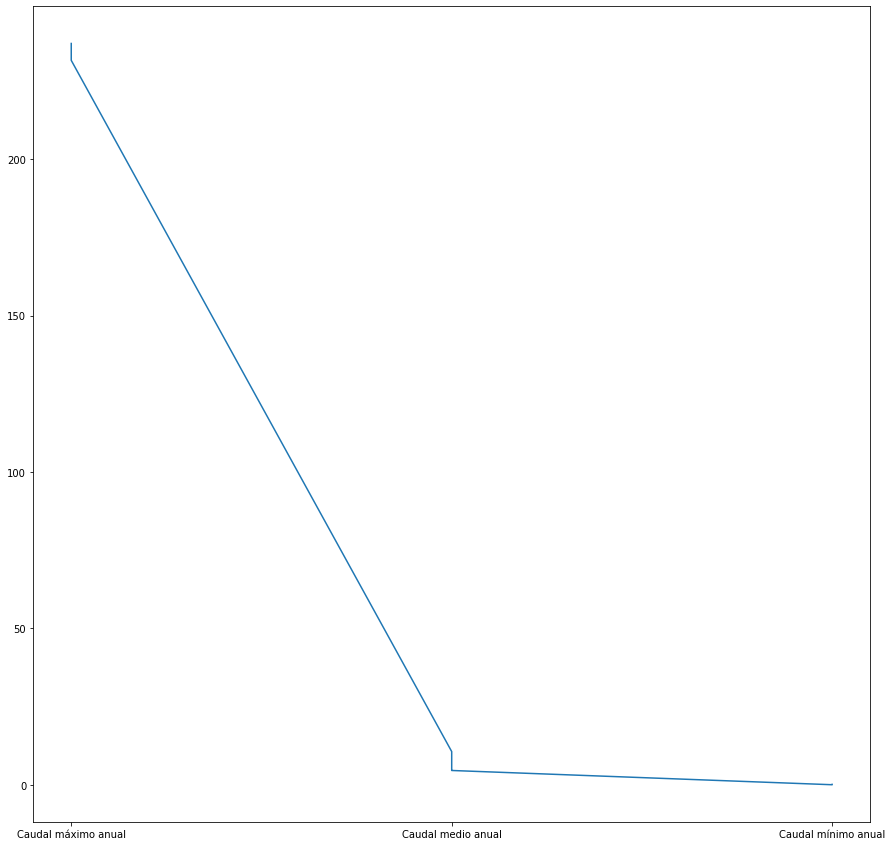

In [40]:
plt.figure(figsize=(15,15))
plt.plot(w,label='caudal diario')

In [47]:
q_d[q_d.Valor==np.max(y)]

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,AreaOperativa,Departamento,Municipio,FechaInstalacion,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,
Caudal máximo anual,23067070,VILLETA - AUT [23067070],5.008583,-74.467111,878,Limnimétrica,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Cundinamarca,Villeta,15/08/1974 00:00,CAUDAL,Q_MX_A,Annual,01/01/2018 00:00,237.0,50,NaN,900


In [46]:
m=q_dm['Valor'].values
m

array([10.60744522,  4.56874027,  4.55825913])

In [32]:
#caudal diario medio
print(('caudal medio minimo: '), (np.min(m)), 'm3/s')
print(('caudal medio maximo: '), (np.max(m)), 'm3/s')
print(('caudal  medio promedio: '), (np.min(m)), 'm3/s')

caudal medio minimo:  0.126508467023173 m3/s
caudal medio maximo:  133.565625000091 m3/s
caudal  medio promedio:  0.126508467023173 m3/s


In [66]:
np.max(m)

133.565625000091

In [55]:
np.mean(m)

5.414642646626046

(array([1.567e+03, 1.010e+02, 2.600e+01, 1.400e+01, 6.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.26508467e-01, 1.34704201e+01, 2.68143318e+01, 4.01582434e+01,
        5.35021551e+01, 6.68460667e+01, 8.01899784e+01, 9.35338900e+01,
        1.06877802e+02, 1.20221713e+02, 1.33565625e+02]),
 <a list of 10 Patch objects>)

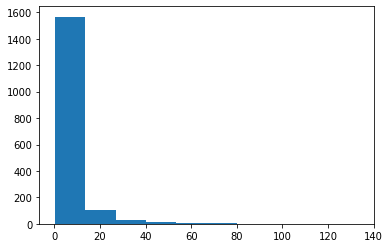

In [33]:
plt.hist(m)